# Predicting Median Home Price Using Machine Learning

## 1. Install Libraries

In [1]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn 
%pip install numpy 
%pip install xgboost 

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip in

## Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Convert CSV File Into a Pandas Data Frame & View Variables

In [3]:
housing_df = pd.read_csv('housing.csv')
housing_df.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

# 2. Dataset Exploration Using Descriptive Statistics

## Histogram (Matplotlib)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

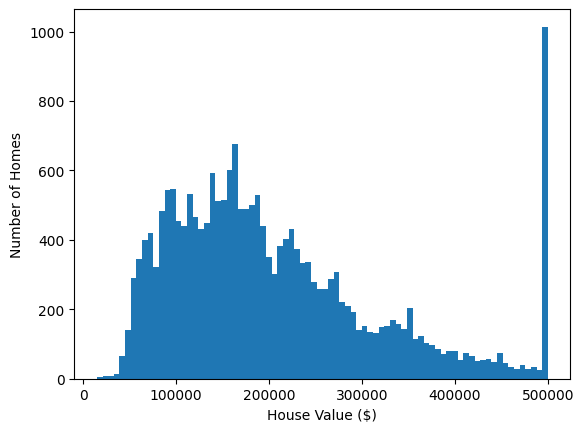

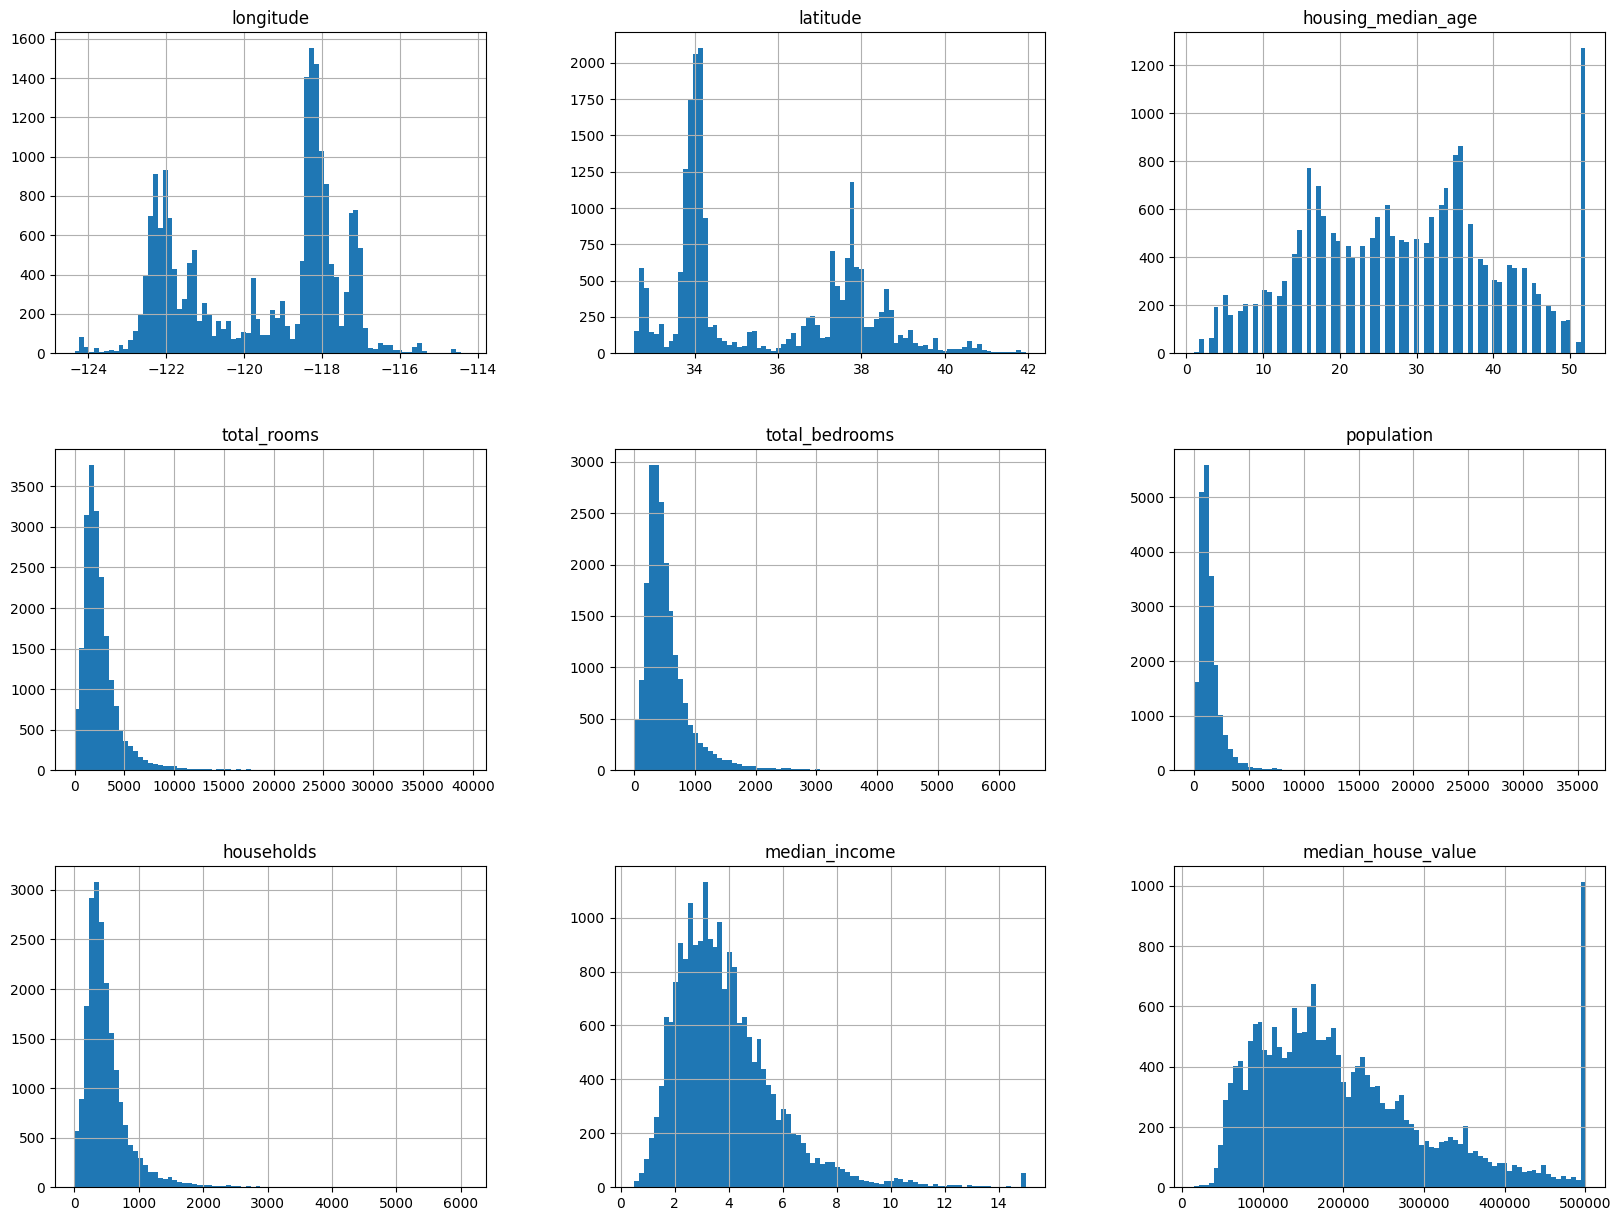

In [5]:
plt.hist(housing_df['median_house_value'], bins=80)
plt.xlabel("House Value ($)")
plt.ylabel("Number of Homes")

housing_df.hist(bins=80, figsize=(20,15))

### We can see from the histogram that the values of the Median House Value variable are normally distributed with a few outliers. Most of the home values are around the $100K-$200K range.

## Correlation Heatmap Matrix (Seaborn)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

<function matplotlib.pyplot.show(close=None, block=None)>

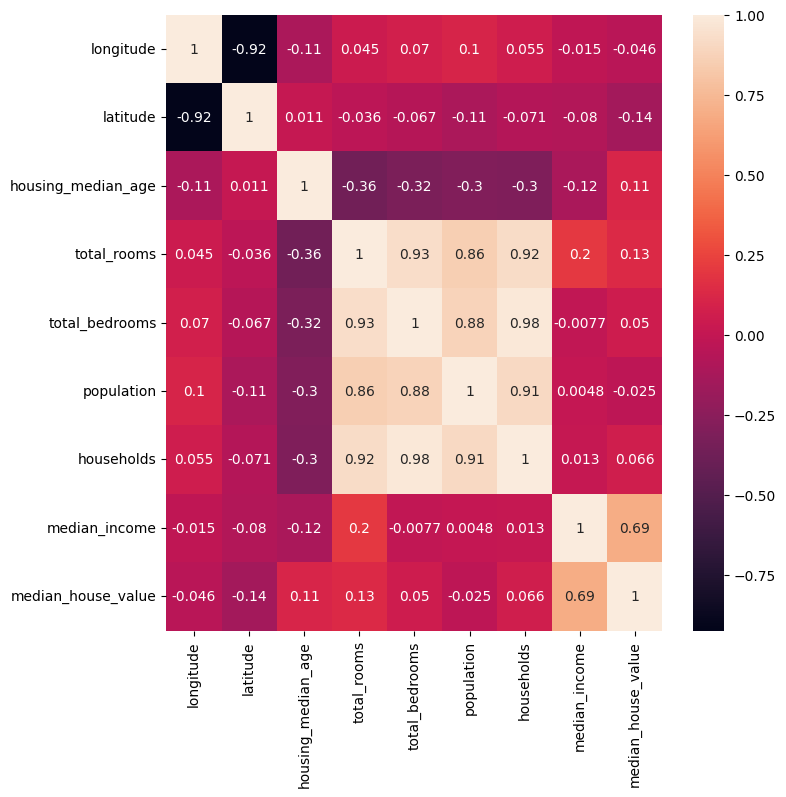

In [ ]:
numeric_df = housing_df.select_dtypes(include=['number'])
corr = numeric_df.corr()
print(corr)

plt.figure(figsize = (8,8))
sns.heatmap(corr, annot=True)
plt.show

# 3. Data Cleaning & Preparation

## Check for missing values

In [9]:
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
# Percentage of dataset that has missing values (1%)
housing_df['total_bedrooms'].isnull().sum()/housing_df.shape[0]*100

np.float64(1.002906976744186)

## Handle Missing Values Using Imputation (Sci-Kit Learn)

In [ ]:
from sklearn.impute import KNNImputer
# Create a temporary copy of the dataset
housing_df_temp = housing_df.copy()
# Retrieve columns with numerical data only
columns_list = [col for col in housing_df_temp.columns if housing_df_temp[col].dtype != 'object']
# Extract columns that contain at least one missing value
new_column_list = [col for col in housing_df_temp.loc[:, housing_df_temp.isnull().any()]]
# Update temporary dataframe with numeric columns that have empty values
housing_df_temp = housing_df_temp[new_column_list]


In [12]:
# Initialize KNNImputer to impute missing data using machine learning:
knn = KNNImputer(n_neighbors = 3)
# Fit function trains the model
knn.fit(housing_df_temp)
# Transform the data using the model - applies the transformation model (knn) to data:
array_values = knn.transform(housing_df_temp)

# Convert the array values to a dataframe with the appropriate column names
housing_df_temp = pd.DataFrame(array_values, columns=new_column_list)

In [13]:
# Confirm there are no missing values
housing_df_temp.isnull().sum()

total_bedrooms    0
dtype: int64

## Feature Engineering

### As seen in the above correlation heatmap matrix, some features have strong correlations that should be weak correlations, but are not relevant. I am running a test to see if removal of these variables will affect the model's performance.

# Go back and reword this as it makes no sense

### Create new features composed of the variables with a strong correlation that should really be weak correlation

In [14]:
# A new feature that is a ratio of the total rooms to total households
housing_df['rooms_per_household']=housing_df['total_rooms']/housing_df['households']

# A new feature that is a a ratio of the total bedrooms to the total rooms
housing_df['bedrooms_per_household']=housing_df['total_bedrooms']/housing_df['total_rooms']

# A new feature that is a ratio of the population to the households
housing_df['population_per_household']=housing_df['population']/housing_df['households']

# Combine the latitude and longitude into one
housing_df['coordinates'] = housing_df['longitude']/housing_df['latitude']

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_household    20433 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  coordinates               20640 non-null  float64
dtypes: flo

## Drop the old variables

In [15]:
housing_df = housing_df.drop('total_rooms', axis=1)
housing_df = housing_df.drop('households', axis=1)
housing_df = housing_df.drop('total_bedrooms', axis=1)
housing_df = housing_df.drop('population', axis=1)
housing_df = housing_df.drop('longitude', axis=1)
housing_df = housing_df.drop('latitude', axis=1)

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  float64
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  float64
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_household    20433 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coordinates               20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


## Revised Correlation Heatmap Matrix After Feature Engineering

<function matplotlib.pyplot.show(close=None, block=None)>

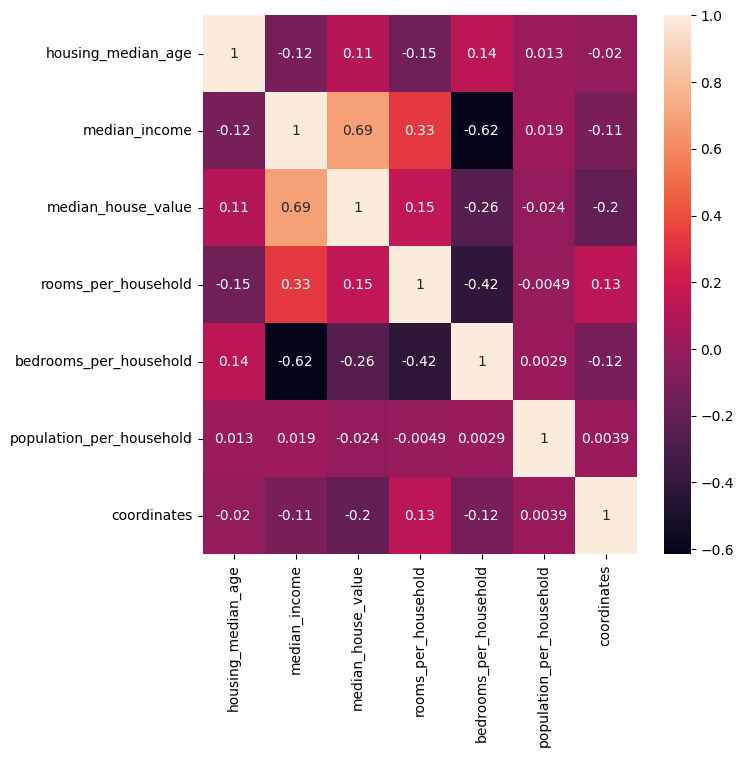

In [16]:
corr = housing_df.corr(numeric_only=True)
plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True)
plt.show

## One-Hot Encoding Categorical Variables

In [17]:
# Most ML algorithms can only learn from numeric data, so categorical data must be encoded. 
# Review data types again to see which variables are categorical
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  float64
 1   median_income             20640 non-null  float64
 2   median_house_value        20640 non-null  float64
 3   ocean_proximity           20640 non-null  object 
 4   rooms_per_household       20640 non-null  float64
 5   bedrooms_per_household    20433 non-null  float64
 6   population_per_household  20640 non-null  float64
 7   coordinates               20640 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.3+ MB


### Ocean Proximity is the only categorical variable

In [18]:
# Unique categories for OCEAN_PROXIMITY
housing_df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [19]:
# Count the values in each unique category
housing_df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

### Create dummy variables of the categorical variable to replace it with numerical values of each unique category for ocean proximity

In [20]:
print(pd.get_dummies(housing_df['ocean_proximity']))

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0          False   False   False      True       False
1          False   False   False      True       False
2          False   False   False      True       False
3          False   False   False      True       False
4          False   False   False      True       False
...          ...     ...     ...       ...         ...
20635      False    True   False     False       False
20636      False    True   False     False       False
20637      False    True   False     False       False
20638      False    True   False     False       False
20639      False    True   False     False       False

[20640 rows x 5 columns]


In [21]:
# Replace the OCEAN_PROXIMITY column using get_dummies()
housing_df_encoded = pd.get_dummies(housing_df, columns=['ocean_proximity'], dtype=int)

In [22]:
# Print the first few observations, the old OCEAN_PROXIMITY should be gone
housing_df_encoded.head()

,housing_median_age,median_income,median_house_value,rooms_per_household,bedrooms_per_household,population_per_household,coordinates,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,8.3252,452600.0,6.984127,0.146591,2.555556,-3.226769,0,0,0,1,0
1,21.0,8.3014,358500.0,6.238137,0.155797,2.109842,-3.228209,0,0,0,1,0
2,52.0,7.2574,352100.0,8.288136,0.129516,2.802260,-3.229590,0,0,0,1,0
3,52.0,5.6431,341300.0,5.817352,0.184458,2.547945,-3.229855,0,0,0,1,0
4,52.0,3.8462,342200.0,6.281853,0.172096,2.181467,-3.229855,0,0,0,1,0


# 4. Partition Data for Modeling (Sci-Kit Learn & Pandas)

In [23]:
# Train the model with 70% of the sample data and the test with the remaining 30%
from sklearn.model_selection import train_test_split

# Define features and target
X = housing_df_encoded.drop('median_house_value', axis=1)
y = housing_df_encoded['median_house_value']

# Impute missing values with median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [24]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, random_state=42, shuffle=True, test_size=0.3)

# Confirm how the data was split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14448, 11)
(6192, 11)
(14448,)
(6192,)


## Linear Regression Model

In [25]:
# Linear Regression - Model Training
# Use Scikit-Learn's LinearRegression to train the model on both the training data and evaluate it on the test sets
from sklearn.linear_model import LinearRegression

# Create a linear regression model using all the feature variables
reg_model = LinearRegression()

# Train the model using the training sets
reg_model.fit(X_train, y_train)

LinearRegression()

In [26]:
# Run the predictions
# Run the predictions on the training and testing data
y_pred_test = reg_model.predict(X_test)

### Model Accuracy

In [27]:
# Evaluate the model
# Compare the actual values with the values predicted by the model
pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
pred_test_df

,Actual,Predicted
20046,47700.0,53405.296840
3024,45800.0,97431.706371
15663,500001.0,236421.017811
20484,218600.0,292304.234901
9814,278000.0,236588.053464
...,...,...
17505,237500.0,209304.634501
13512,67300.0,74640.438821
10842,218400.0,215452.143080
16559,119400.0,125811.202747


In [28]:
# Evaluate the model using R^2 (difference between actual and predicted values)
r2_reg_model_test = round(reg_model.score(X_test, y_test),2)
print("R^2 Test: {}".format(r2_reg_model_test))

R^2 Test: 0.61


### The R^2 value of the linear regression model is 0.61, which suggests that the model is moderately accurate at predicting the median home price.

## Random Forest Model

In [29]:
from sklearn.ensemble import RandomForestRegressor

#  Create a regressor using all the feature variables
rf_model = RandomForestRegressor(n_estimators=10,random_state=10)

# Train the model using the training sets
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=10)

### Model Accuracy

In [30]:
# Run the predictions
y_rf_pred_test_df = rf_model.predict(X_test)

In [31]:
# Evaluate the model
# Compare the actual values with the values predicted by the model
y_rf_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_rf_pred_test_df})
y_rf_pred_test_df

,Actual,Predicted
20046,47700.0,52440.0
3024,45800.0,88940.0
15663,500001.0,442670.3
20484,218600.0,295100.0
9814,278000.0,217840.0
...,...,...
17505,237500.0,241580.1
13512,67300.0,72000.0
10842,218400.0,202330.0
16559,119400.0,129890.0


In [32]:
# Determine accuracy using R^2
from sklearn.metrics import r2_score

score = r2_score(y_test, y_rf_pred_test_df['Predicted'])

print("R^2 = {}%".format(round(score,2)*100))

R^2 = 76.0%


### The R^2 value of the random forest model is 0.76, which suggests that the model is mostly accurate at predicting the median home price. This model predicts median house values more accurately than the linear regression model.

### Testing Data Accuracy Using RMSE

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_rf_pred_test_df['Predicted']) ** 0.5
print('RMSE on test data:', rmse)

RMSE on test data: 56260.78489489574


### Determining Feature Performance

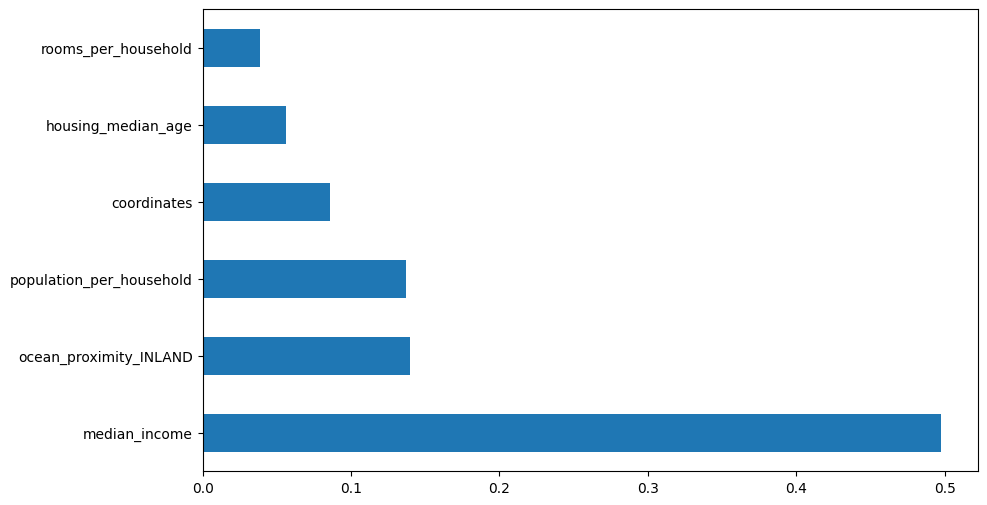

In [34]:
plt.figure(figsize=(10,6))
feat_importances = pd.Series(rf_model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(6).plot(kind='barh');

In [35]:
print(X_train.columns.tolist())

['housing_median_age', 'median_income', 'rooms_per_household', 'bedrooms_per_household', 'population_per_household', 'coordinates', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']


## Retrain the model using the six most important features to see if RMSE increases for both training and validation datasets

In [36]:
train_x_if = X_train[['rooms_per_household', 'housing_median_age', 'coordinates',
'ocean_proximity_INLAND', 'population_per_household', 'median_income']]

test_x_if = X_test[['rooms_per_household', 'housing_median_age', 'coordinates',
'ocean_proximity_INLAND', 'population_per_household', 'median_income']]

 # Create an object of the RandomForestRegressor Model
from sklearn.ensemble import RandomForestRegressor
rf_model_if = RandomForestRegressor(n_estimators=10, random_state=10) 

# Fit the model with the training data
rf_model_if.fit(train_x_if, y_train) 
predict_test_with_if = rf_model_if.predict(test_x_if)

In [37]:
# RMSE on the training and test data
print('RMSE on test data: ', mean_squared_error(y_test, predict_test_with_if)**(0.5))

RMSE on test data:  56447.1698154472


## XGBoost

In [42]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()

In [43]:
# Train the model using the training sets 
X_train.columns = X_train.columns.str.replace('[<>[\](){}]', '', regex=True).str.replace(' ', '_')
X_test.columns = X_test.columns.str.replace('[<>[\](){}]', '', regex=True).str.replace(' ', '_')
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
# Run the predictions
y_xgb_pred_test = xgb_model.predict(X_test)

In [45]:
# Evaluate the model
xgb_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_xgb_pred_test})
xgb_pred_test_df

,Actual,Predicted
20046,47700.0,67930.468750
3024,45800.0,90165.093750
15663,500001.0,485607.343750
20484,218600.0,249588.000000
9814,278000.0,238554.750000
...,...,...
17505,237500.0,209835.906250
13512,67300.0,62140.125000
10842,218400.0,210414.234375
16559,119400.0,124240.296875


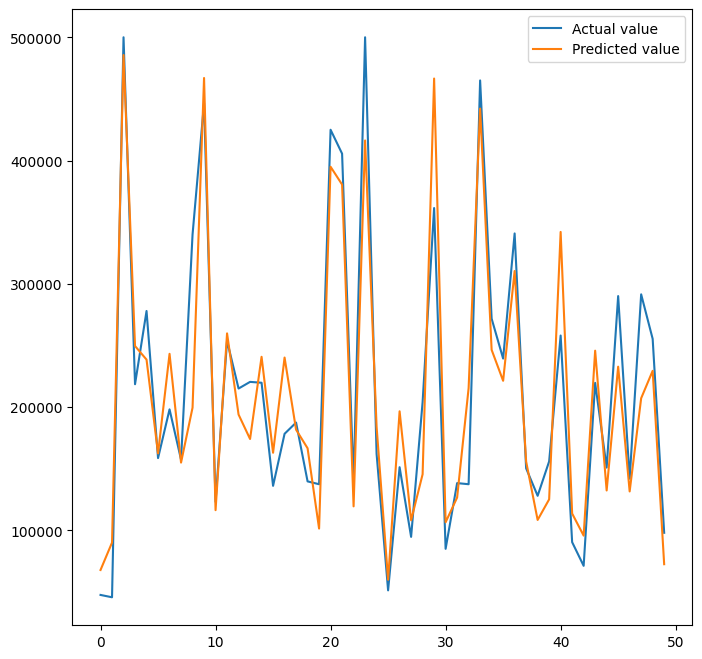

In [46]:
fig=plt.figure(figsize=(8,8))
xgb_pred_test_df = xgb_pred_test_df.reset_index()
xgb_pred_test_df = xgb_pred_test_df.drop(['index'],axis=1)
plt.plot(xgb_pred_test_df[:50])
plt.legend(['Actual value','Predicted value'])

In [47]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_xgb_pred_test)
print("R^2 - {}%".format(round(score*100,2)))

R^2 - 78.1%


### The R^2 value of the XGBoost is 0.78, which suggests that the model is mostly accurate at predicting the median home price. This model predicts median house values more accurately than the linear regression model and random forest models.

In [48]:
# Determine MSE and RMSE
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(y_test, y_xgb_pred_test)
rmse = math.sqrt(mean_squared_error(y_test,y_xgb_pred_test))

print("MSE:",mse)
print("RMSE:",rmse)

MSE: 2873821854.770443
RMSE: 53608.039087159705


## Run XGBoost again using tuned hyperparameters

In [49]:
xgb_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [50]:
# Setting hyperparameters for XGBoost
xgb_model_2 = XGBRegressor(
        gamma=0.05,
        learning_rate=0.01,
        max_depth=6,
        n_estimators=1000,
        n_jobs=10,
        objective='reg:squarederror',
        subsample=0.8,
        scale_pos_weight=0,
        reg_alpha=0,
        reg_lambda=1,
        verbosity=1)

xgb_model_2.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.05, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=10,
             num_parallel_tree=None, random_state=None, ...)

In [51]:
# Run the predictions on the training and test data
y_xgb_2_pred_test = xgb_model_2.predict(X_test)

In [52]:
# Compare the actual values with the values predicted by the model
xgb_2_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_xgb_2_pred_test})

xgb_2_pred_test_df

,Actual,Predicted
20046,47700.0,59031.707031
3024,45800.0,85579.382812
15663,500001.0,451685.406250
20484,218600.0,260188.875000
9814,278000.0,246518.468750
...,...,...
17505,237500.0,232473.093750
13512,67300.0,63126.183594
10842,218400.0,225433.125000
16559,119400.0,124145.101562


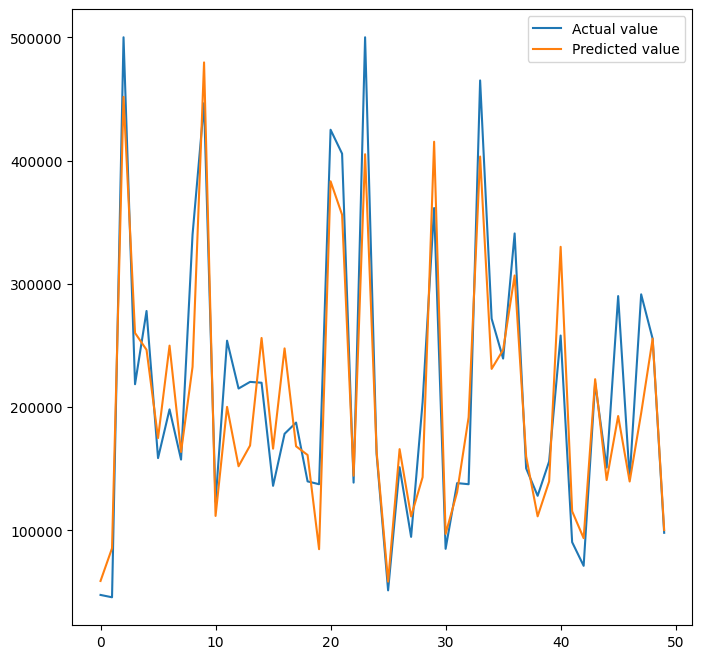

In [53]:
fig = plt.figure(figsize=(8,8))
xgb_2_pred_test_df = xgb_2_pred_test_df.reset_index()
xgb_2_pred_test_df = xgb_2_pred_test_df.drop(['index'],axis=1)
plt.plot(xgb_2_pred_test_df[:50])
plt.legend(['Actual value','Predicted value'])

In [54]:
from sklearn.metrics import mean_squared_error

mse = np.sqrt(mean_squared_error(y_test, y_xgb_2_pred_test))
print("RMSE: %.2f" % (mse**(1/2.0)))

RMSE: 228.21


In [55]:
# Determine accuracy using R^2
r2_xgb_model_2_test = round(xgb_model_2.score(X_test, y_test),2)

print("R^2 Test: {}".format(r2_xgb_model_2_test))

R^2 Test: 0.79


### The R^2 value of the XGBoost is 0.79, which suggests that the model is mostly accurate at predicting the median home price. This model predicts median house values more accurately than the linear regression, random forest, and the original XGBoost model.

# In conclusion: The XGBoost model predicts the median house value most accurately and has the best fit with the data.